In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys



In [2]:
df = pd.read_csv('Lab 2 Data.tsv', delimiter = '\t', header = 0, usecols = [0, 2, 4, 5])
print(df.columns.values)

['RecordingTimestamp' 'GazeEventDuration(mS)' 'GazePointX(px)'
 'GazePointY(px)']


Text(0, 0.5, 'y-position')

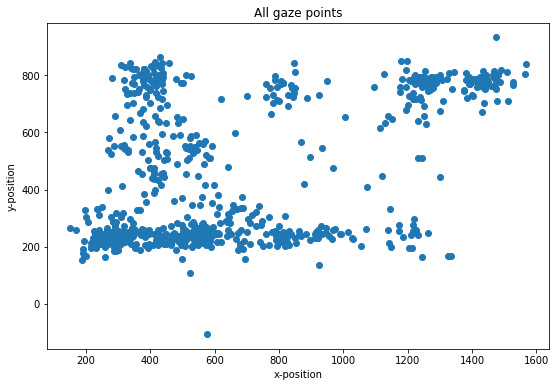

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(df['GazePointX(px)'], df['GazePointY(px)'])
plt.title('All gaze points')
plt.xlabel('x-position')
plt.ylabel('y-position')

Text(0, 0.5, 'y-position')

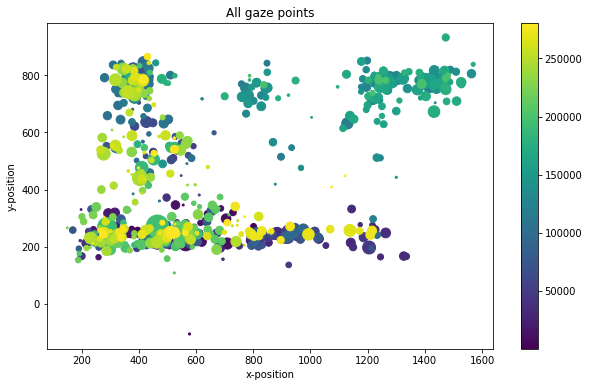

In [4]:
point_sizes = df['GazeEventDuration(mS)'].to_numpy() / 6

plt.figure(figsize=(10,6))
plt.scatter(df['GazePointX(px)'], df['GazePointY(px)'], c = df['RecordingTimestamp'], s = point_sizes)
plt.colorbar()
plt.title('All gaze points')
plt.xlabel('x-position')
plt.ylabel('y-position')

Text(0, 0.5, 'y-position')

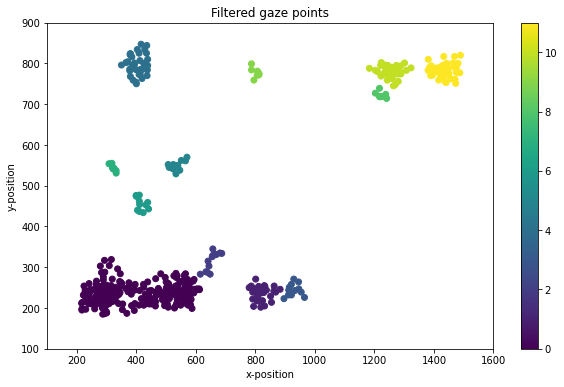

In [10]:
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import connected_components

eps = 21 # Distance between points for them to be connected
size_thresh = 6

points = df[['GazePointX(px)', 'GazePointY(px)']].to_numpy()
distances = cdist(points, points)
adjacency_matrix = distances < eps

n_clusters, labels = connected_components(adjacency_matrix)
unique, cluster_sizes = np.unique(labels, return_counts=True)
size_mask = np.nonzero(cluster_sizes > size_thresh)
size_mask = np.in1d(labels, size_mask)

masked_points = points[size_mask]
masked_point_sizes = point_sizes[size_mask]
masked_distances = cdist(masked_points, masked_points)
masked_adjacency_matrix = masked_distances < eps
masked_n_clusters, masked_labels = connected_components(masked_adjacency_matrix)

plt.figure(figsize=(10,6))
plt.scatter(masked_points[:,0], masked_points[:,1], c=masked_labels)
plt.xlim(100, 1600)
plt.ylim(100, 900)
plt.colorbar()
plt.title('Filtered gaze points')
plt.xlabel('x-position')
plt.ylabel('y-position')

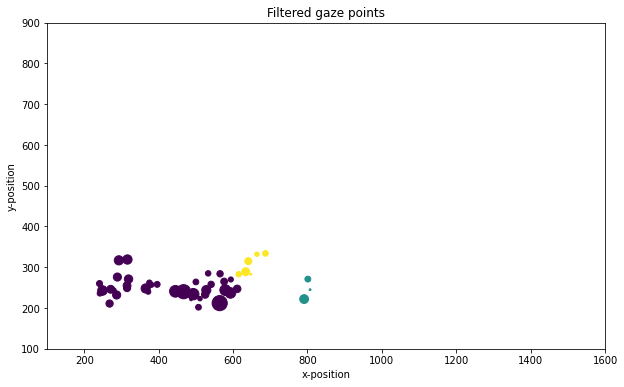

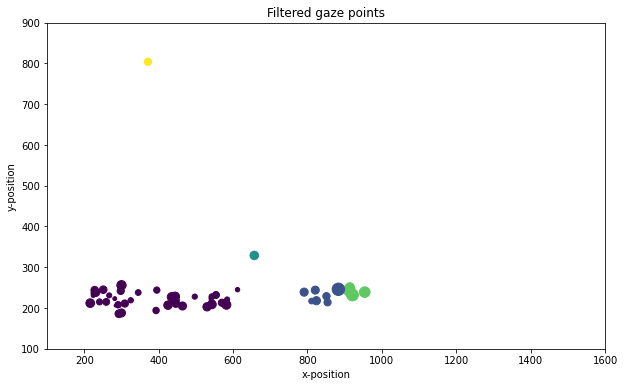

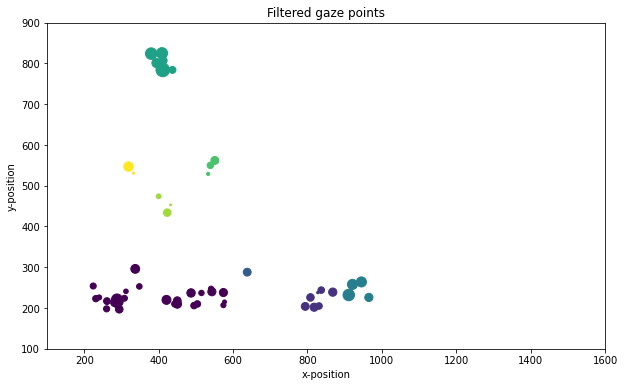

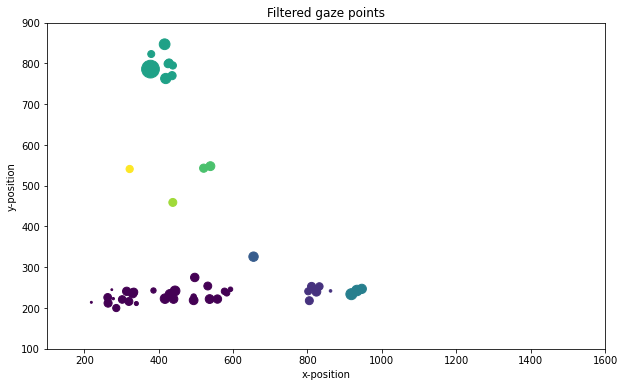

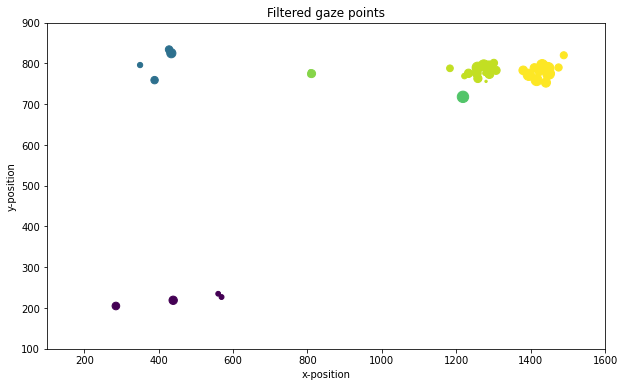

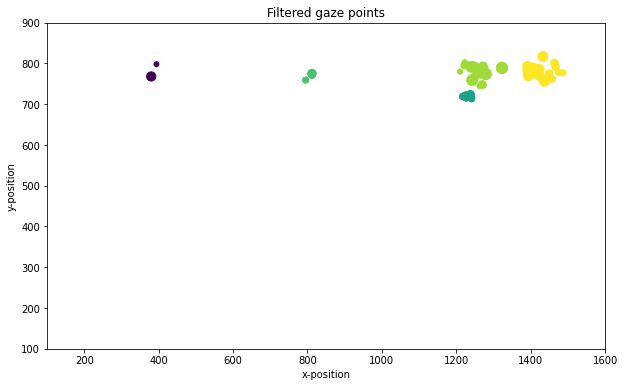

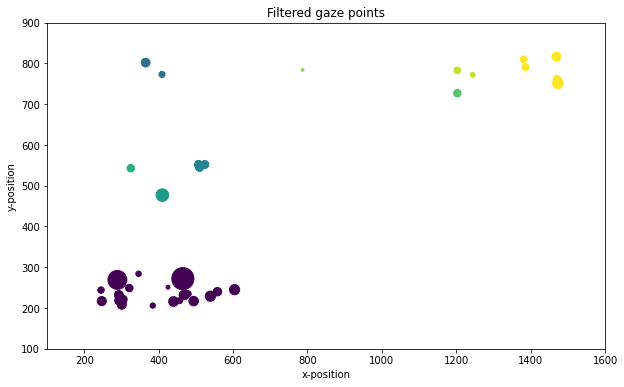

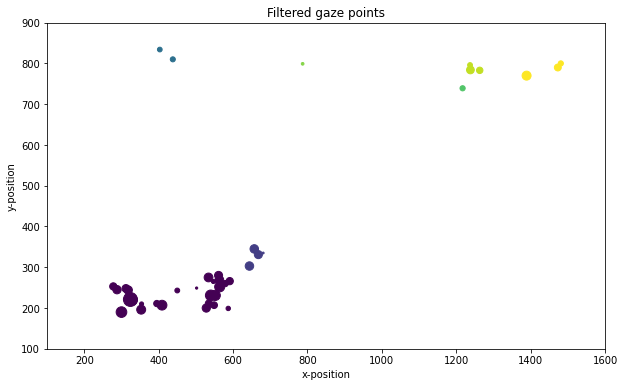

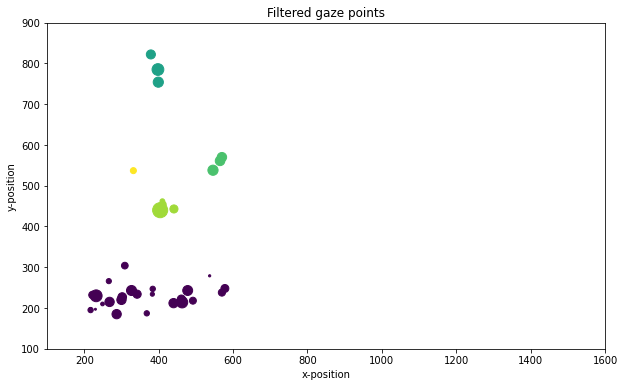

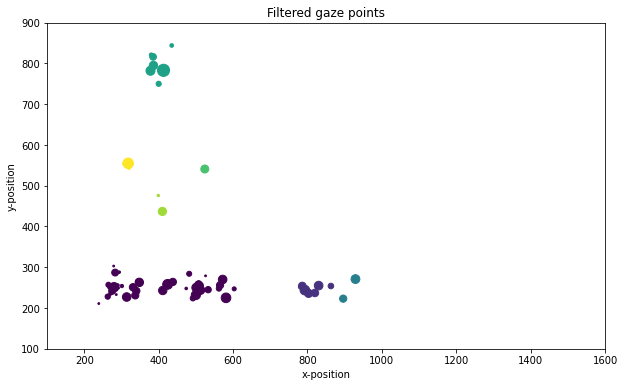

In [11]:
df['Noise'] = ~size_mask
df['Cluster'] = size_mask
df.loc[df['Cluster'] == False, 'Cluster'] = -1
df.loc[df['Cluster'] == True, 'Cluster'] = masked_labels
df['PointSize'] = point_sizes

n_samples = 10
max_time = max(df['RecordingTimestamp'])
for i in range(n_samples):
    min_interval = (max_time/n_samples)*(i)
    max_interval = (max_time/n_samples)*(i+1)
    df_subset = df[(df['Noise'] == False) & (df['RecordingTimestamp'] > min_interval) & (df['RecordingTimestamp'] < max_interval)]
    plt.figure(figsize=(10,6))
    plt.scatter(df_subset['GazePointX(px)'], df_subset['GazePointY(px)'], c = df_subset['Cluster'], s = df_subset['PointSize'])
    plt.xlim(100, 1600)
    plt.ylim(100, 900)
#     plt.colorbar()
    plt.title('Filtered gaze points'.format(round(min_interval), round(max_interval)))
    plt.xlabel('x-position')
    plt.ylabel('y-position')
    plt.show()

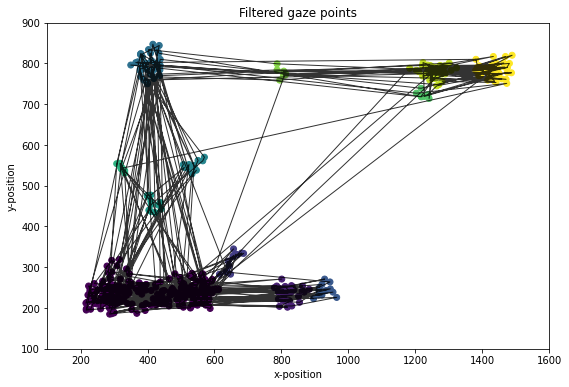

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(masked_points[:,0], masked_points[:,1], c=masked_labels)
ax.plot(masked_points[:,0], masked_points[:,1], linewidth=1, c='black', alpha=0.8)   
plt.xlim(100, 1600)
plt.ylim(100, 900)
plt.title('Filtered gaze points')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.show()
